In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [16]:
car_sales = pd.read_csv('Car_sales.csv')
car_sales

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [18]:
print("Missing Values:")
print(car_sales.isnull().sum())

print("\nDuplicated Rows:")
print(car_sales.duplicated().sum())

Missing Values:
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

Duplicated Rows:
0


In [20]:
# To find the percentage of missing values per variable
missing_data_percentage = (car_sales.isnull().sum() / len(car_sales)) * 100

# New DataFrame to display
missing_data = pd.DataFrame({'Variable': car_sales.columns, 'Missing Percentage': missing_data_percentage})

# Filter variables with missing data
missing_data = missing_data[missing_data['Missing Percentage'] > 0]

# Sort the variables by missing percentage in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

print(missing_data)


                                Variable  Missing Percentage
__year_resale_value  __year_resale_value           22.929936
Fuel_efficiency          Fuel_efficiency            1.910828
Price_in_thousands    Price_in_thousands            1.273885
Curb_weight                  Curb_weight            1.273885
Power_perf_factor      Power_perf_factor            1.273885
Engine_size                  Engine_size            0.636943
Horsepower                    Horsepower            0.636943
Wheelbase                      Wheelbase            0.636943
Width                              Width            0.636943
Length                            Length            0.636943
Fuel_capacity              Fuel_capacity            0.636943


•	Identify the variable types in the given data set.

In [22]:
car_sales.dtypes  # Below are the types of data of all the columns

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

•	Make a bar graph for manufacturer type

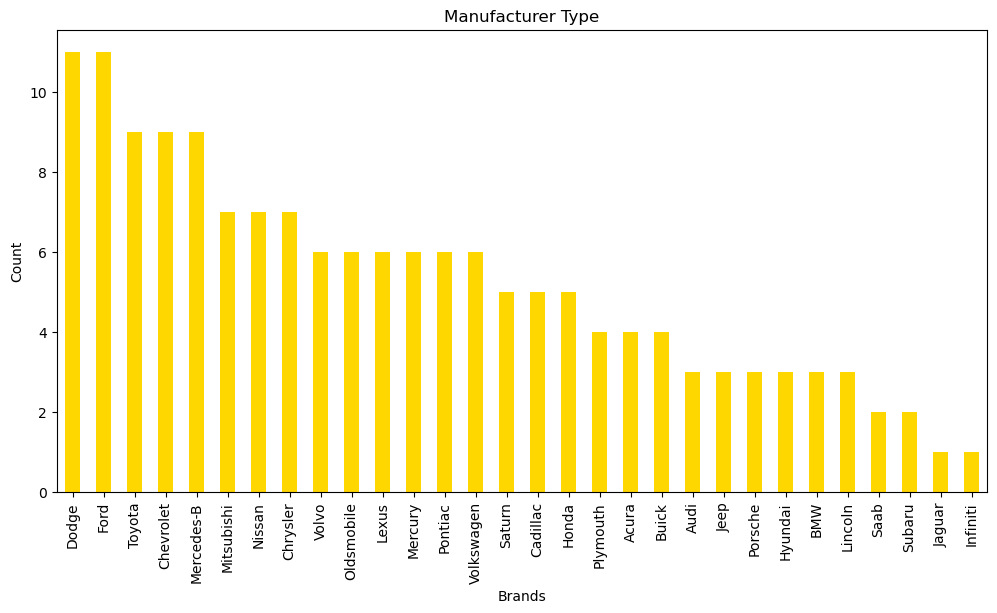

In [27]:
manufacturer_counts = car_sales['Manufacturer'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
manufacturer_counts.plot(kind='bar', color='gold')
plt.title('Manufacturer Type')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.show()

•	Make a pie chart for showing vehicle type by percentage

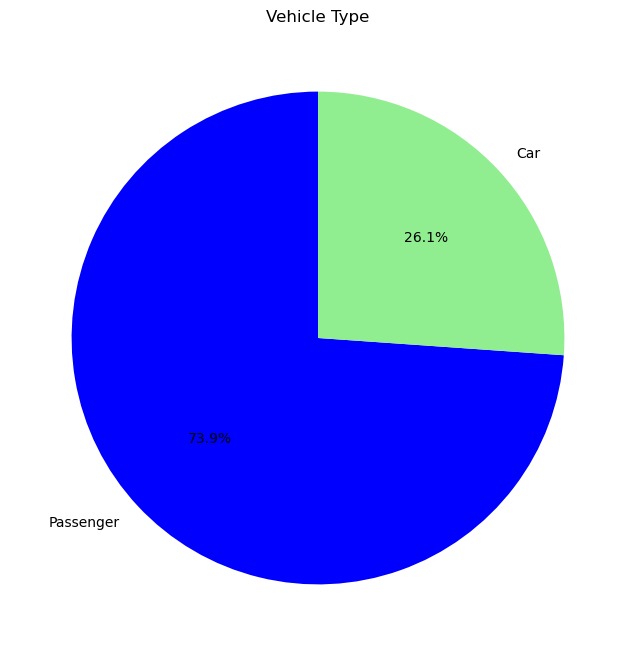

In [30]:
vehicle_type_counts = car_sales['Vehicle_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
vehicle_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'lightgreen'])
plt.title('Vehicle Type')
plt.ylabel('')  # Remove the default 'Vehicle_type' label
plt.show()

•	Calculate average Price of all cars by using correct measure of central Tendency

In [31]:
#'Price_in_thousands' is the column representing the prices
average_price = car_sales['Price_in_thousands'].mean()

print(f'The average price of all cars is: ${average_price:.2f}')


The average price of all cars is: $27.39


•	Calculate the variance and standard deviation for numerical columns such as Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower

In [33]:
#'Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower'
# are the columns we want to calculate variance and standard deviation for
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculate variance for each numerical column
variance_values = car_sales[numerical_columns].var()

# Calculate standard deviation for each numerical column
std_dev_values = car_sales[numerical_columns].std()

# Display the results
print("Variance:")
print(variance_values)

print("\nStandard Deviation:")
print(std_dev_values)

Variance:
Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
dtype: float64

Standard Deviation:
Sales_in_thousands     68.029422
__year_resale_value    11.453384
Price_in_thousands     14.351653
Engine_size             1.044653
Horsepower             56.700321
dtype: float64


•	For the same columns Calculate IQR and identify outliers in these columns
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]


In [38]:
# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Calculate IQR and identify outliers for each numerical column
for column in numerical_columns:
    Q1 = car_sales[column].quantile(0.25)
    Q3 = car_sales[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identifications of outliers
    column_outliers = car_sales[(car_sales[column] < Q1 - 1.5 * IQR) | (car_sales[column] > Q3 + 1.5 * IQR)]
    
    # Adding the outliers to the outliers_df DataFrame
    outliers_df = pd.concat([outliers_df, column_outliers])

    # Display of the results
    print(f"Column: {column}")
    print(f"IQR: {IQR}")
    print(f"Number of outliers: {len(column_outliers)}")
    print("\n")

# Display the DataFrame containing all outliers
print("Outliers Data Frame:")
print(outliers_df)

Column: Sales_in_thousands
IQR: 53.842
Number of outliers: 12


Column: __year_resale_value
IQR: 8.615
Number of outliers: 12


Column: Price_in_thousands
IQR: 13.93
Number of outliers: 9


Column: Engine_size
IQR: 1.2750000000000004
Number of outliers: 3


Column: Horsepower
IQR: 65.5
Number of outliers: 2


Outliers Data Frame:
    Manufacturer           Model  Sales_in_thousands  __year_resale_value  \
40         Dodge      Ram Pickup             227.061               15.060   
45         Dodge         Caravan             181.749               12.025   
49          Ford          Taurus             245.815               10.055   
50          Ford           Focus             175.670                  NaN   
52          Ford        Explorer             276.747               16.640   
53          Ford        Windstar             155.787               13.175   
55          Ford          Ranger             220.650                7.850   
56          Ford        F-Series             540.561

•	Make Histograms for all Numerical columns and identify the distribution of type by calculating skewness; 
Note : If the skewness is 0, it indicates a perfectly symmetrical distribution.
If the skewness is negative, it means the distribution is skewed to the left (long left tail).
If the skewness is positive, it means the distribution is skewed to the right (long right tail).


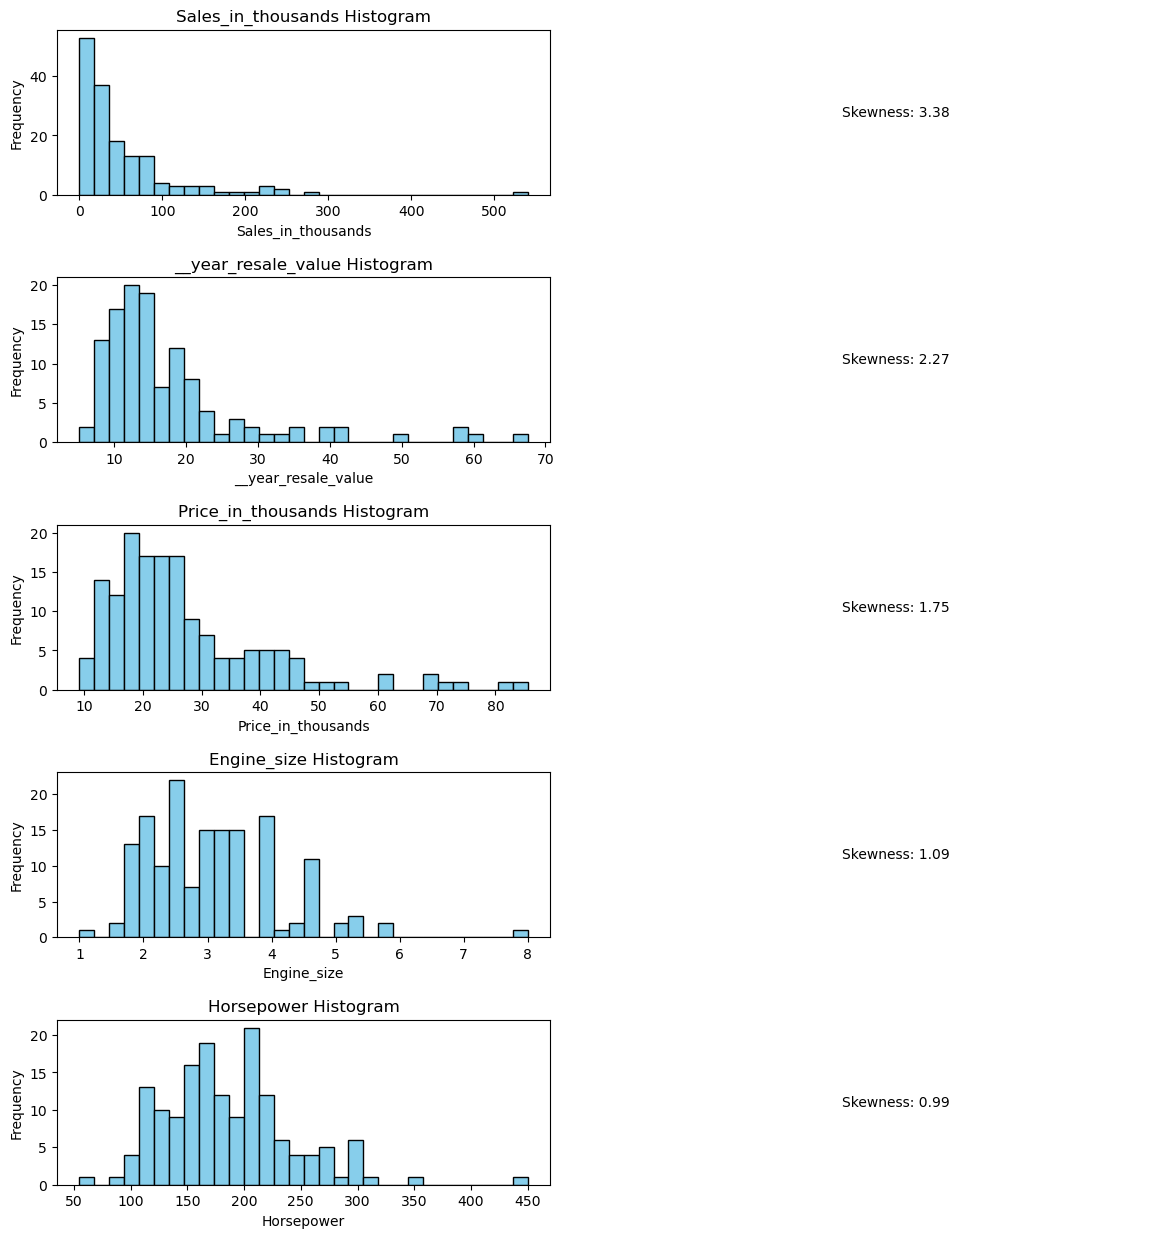

In [40]:
from scipy.stats import skew

# Creating subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 3 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Iterating numerical columns
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i, 0].hist(car_sales[column], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'{column} Histogram')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Calculation of skewness
    skewness_value = skew(car_sales[column].dropna())
    axes[i, 1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', horizontalalignment='center', verticalalignment='center', transform=axes[i, 1].transAxes)
    axes[i, 1].axis('off')

plt.show()


The columns are positively skewed i.e. why the data is spreaded in the first quadrant